# A half circle problem

Imagine the unit circle. We generate random numbers for x (between -1 and 1, taking a uniform distribution). We then compute the corresponding y (with y>0). Let x be the input of a neural network, let y be the desired outcome. You are free to choose the network architecture - recommendation is a network with one input, one hidden layer and one output layer.

Questions:

1. Train the network with all data. Did it perform well? Are you experiencing a large error around the domains x=-1 and x=1? How to solve it? Do you think the network generalized the input data or learnt it by heart?

2. Train the network with only part of the data. Specifically with the data in the interval x$\in$(-1,-0.5) $\bigcup$ (0.5,1). Use the data in the interval (-0.5, 0.5) for testing. Did you manage to force the network to learn the curvature correctly?

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
import numpy as np

np.random.seed(7)

def plot_hist(log):
    loss = log.history['loss']
    vloss = log.history['val_loss']
    x = range(len(loss))
    plt.figure(figsize=(10, 6))
    plt.plot(x, loss, label='loss')
    plt.plot(x, vloss, label='validation')
    plt.legend()
    plt.xlabel('# epochs')
    plt.ylabel('loss')
    plt.show()
    
    print('final loss:', loss[-1])
    print('final validation loss:', vloss[-1])
    

def display(X, Y_real, Y_pred, xlims=None):
    plt.figure(figsize=(6,6))
    plt.scatter(X, Y_real, color='green', label='ground truth')
    plt.scatter(X, Y_pred, color='red', label='result')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    if xlims is not None:
        plt.xlim(xlims)
    plt.plot()
    

def mean_sqerr(y_true, y_pred):
    return K.mean((y_pred-y_true)*(y_pred-y_true))

# 1. Traininig with all data

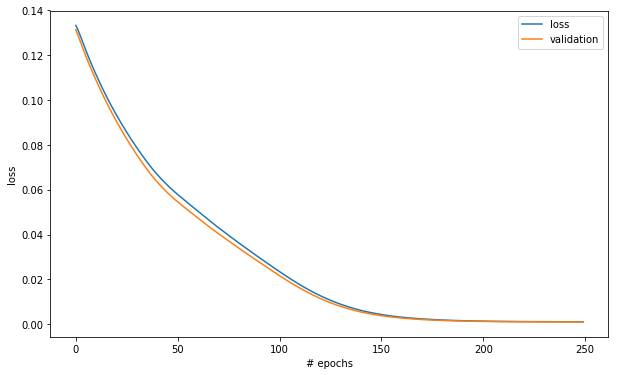

final loss: 0.0010759979486465454
final validation loss: 0.00100232835393399


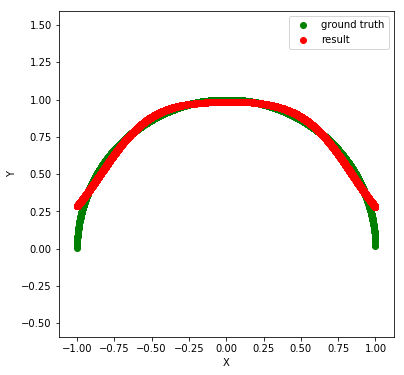

In [26]:
# create model
model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=[mean_sqerr])

# define x and y
nsamples = 10000
batch = int(nsamples/1)

X = np.random.random_sample((nsamples, 1)) * 2 - 1
Y = np.sqrt(1.0 - X[:,0]*X[:,0])
Y = np.reshape(Y, (Y.shape[0], 1))

# Fit the model
temp = model.fit(X, Y, epochs=250, batch_size=batch, validation_split=0.2, verbose=0)

#index = (X < -0.95) | (X > 0.95)
#vx = X[index]
#vy = Y[index]
#temp = model.fit(X, Y, epochs=100, batch_size=batch, validation_data=(vx, vy), verbose=0)

plot_hist(temp)

res = model.predict(X)
display(X, Y, res)

# 2. Training with a data subset

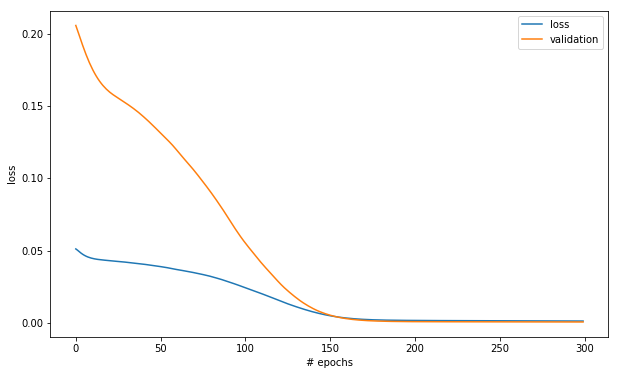

final loss: 0.0012293714098632336
final validation loss: 0.0005921531119383872


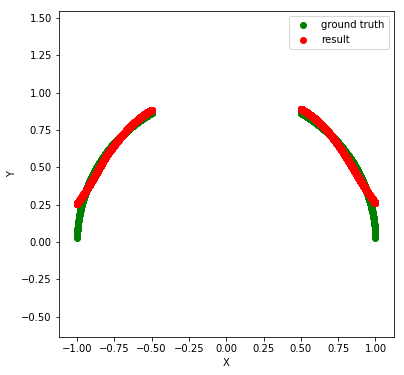

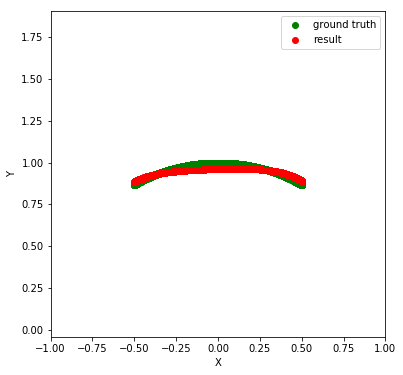

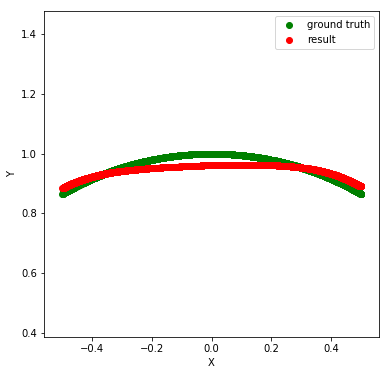

In [27]:
# Compile model
# create model
nsamples = 10000
batch = int(nsamples/1)

X = np.random.random_sample((nsamples, 1)) * 2 - 1
Y = np.sqrt(1.0 - X[:,0]*X[:,0])
Y = np.reshape(Y, (Y.shape[0], 1))

model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=[mean_sqerr])

index = (X < -0.5) | (X > 0.5)
train_x = X[index]
train_y = Y[index]
test_x = X[~index]
test_y = Y[~index]

#temp = model.fit(train_x, train_y, epochs=100, batch_size=200, validation_split=0.2)
temp = model.fit(train_x, train_y, epochs=300, batch_size=batch, validation_data=(test_x, test_y), verbose=0)
res_train = model.predict(train_x)
res_test = model.predict(test_x)

plot_hist(temp)
display(train_x, train_y, res_train)
display(test_x, test_y, res_test, [-1, 1])
display(test_x, test_y, res_test)